In [49]:
#using keras and tenserflow

import pandas as pd

In [50]:
df=pd.read_csv("/AAPL.csv")

In [51]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [52]:
df1=df.reset_index()["close"]

In [53]:
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

In [54]:
df1.shape

(1258,)

In [55]:
import matplotlib.pyplot as plt


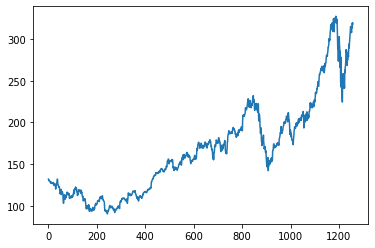

In [56]:
plt.plot(df1)

In [57]:
#As we know LSTM is very sensitive to scale of data so we will apply minmax scaler
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

In [58]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [59]:
print(df1)

[[0.17607447]
 [0.17495567]
 [0.16862282]
 ...
 [0.96635143]
 [0.9563033 ]
 [0.96491598]]


In [60]:
#splitting the data set in to train and test split

In [61]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size 
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [62]:
len(train_data)

817

In [63]:
len(test_data)

441

In [64]:
import numpy as np
#convery an array of value into dataset matrix
def create_dataset(dataset,time_step=1):
  datax,datay=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    datax.append(a)
    datay.append(dataset[i+time_step,0])
  return np.array(datax),np.array(datay)

In [65]:
time_step=100
x_train, y_train=create_dataset(train_data,time_step)
x_test, y_test=create_dataset(test_data,time_step)
print(x_train)

[[0.17607447 0.17495567 0.16862282 ... 0.09055982 0.08388922 0.09085536]
 [0.17495567 0.16862282 0.1696994  ... 0.08388922 0.09085536 0.0873934 ]
 [0.16862282 0.1696994  0.16727181 ... 0.09085536 0.0873934  0.09030651]
 ...
 [0.34801148 0.32930845 0.32145571 ... 0.50042219 0.50413747 0.5062062 ]
 [0.32930845 0.32145571 0.32694419 ... 0.50413747 0.5062062  0.51920966]
 [0.32145571 0.32694419 0.32230009 ... 0.5062062  0.51920966 0.53719497]]


In [66]:
print(x_train.shape), print(x_test.shape)

(716, 100)
(340, 100)


(None, None)

In [67]:
print(y_train.shape), print(y_test.shape)

(716,)
(340,)


(None, None)

In [97]:
#Reshaping input into sample timestep and features
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [95]:
#create LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [96]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")



In [99]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [100]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 9s 309ms/step - loss: 0.0150 - val_loss: 0.0537
Epoch 2/100
12/12 [==============================] - 2s 202ms/step - loss: 0.0031 - val_loss: 0.0040
Epoch 3/100
12/12 [==============================] - 2s 205ms/step - loss: 8.7354e-04 - val_loss: 0.0096
Epoch 4/100
12/12 [==============================] - 2s 207ms/step - loss: 7.7105e-04 - val_loss: 0.0038
Epoch 5/100
12/12 [==============================] - 2s 209ms/step - loss: 6.1739e-04 - val_loss: 0.0037
Epoch 6/100
12/12 [==============================] - 2s 208ms/step - loss: 5.8948e-04 - val_loss: 0.0038
Epoch 7/100
12/12 [==============================] - 2s 203ms/step - loss: 5.8508e-04 - val_loss: 0.0037
Epoch 8/100
12/12 [==============================] - 2s 206ms/step - loss: 5.8362e-04 - val_loss: 0.0038
Epoch 9/100
12/12 [==============================] - 2s 207ms/step - loss: 6.1402e-04 - val_loss: 0.0034
Epoch 10/100
12/12 [==============================] - 2s 196ms/

In [126]:
#lets predict and check perfromance matrix
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [127]:
#transform to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [128]:
#calculate RMSE performance matrix
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

142.49975176799595

In [129]:
math.sqrt(mean_squared_error(y_test,test_predict))

239.14624860250728

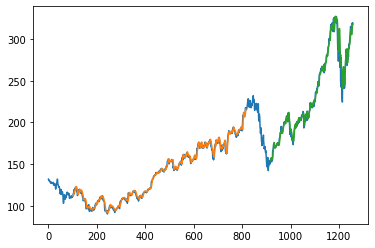

In [130]:
#plotting
look_back=100
trainpredictplot=np.empty_like(df1)
trainpredictplot[:,:]=np.nan
trainpredictplot[look_back:len(train_predict)+look_back,:]=train_predict
testpredictplot=np.empty_like(df1)
testpredictplot[:,:]=np.nan
testpredictplot[len(train_predict)+(look_back*2)+1:len(df1)-1,:]=test_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainpredictplot)
plt.plot(testpredictplot)
plt.show()

In [131]:
x_input=test_data[341:].reshape(1,-1)
x_input

array([[0.85835515, 0.8866419 , 0.87431394, 0.88431985, 0.87836697,
        0.8986321 , 0.92582116, 0.92877649, 0.95676771, 0.93869797,
        0.93304061, 0.94950604, 0.96424048, 0.95512117, 0.95989192,
        0.96635143, 0.96246728, 0.92295027, 0.9598497 , 0.98792536,
        0.98594106, 0.92531453, 0.92172591, 0.96474711, 0.97572406,
        0.99159841, 0.96972895, 0.97614625, 0.96795575, 1.        ,
        0.99016297, 0.99050072, 0.96538039, 0.98488559, 0.97086887,
        0.94026007, 0.87748037, 0.83483915, 0.85413324, 0.77336823,
        0.77269273, 0.88014017, 0.84007431, 0.89673225, 0.85527316,
        0.83884995, 0.74233725, 0.82327113, 0.78143207, 0.6665963 ,
        0.7921557 , 0.64118044, 0.68614371, 0.66001013, 0.65203074,
        0.58642236, 0.56586169, 0.66089673, 0.65515494, 0.70970193,
        0.66452757, 0.69437642, 0.69218104, 0.63569197, 0.65266402,
        0.63780292, 0.7267162 , 0.71388162, 0.74191506, 0.75002111,
        0.77222832, 0.83049059, 0.8194292 , 0.82

In [133]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [134]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.96349645]
101
1 day input [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.

In [136]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [137]:
import matplotlib.pyplot as plt

In [138]:
len(df1)

1258

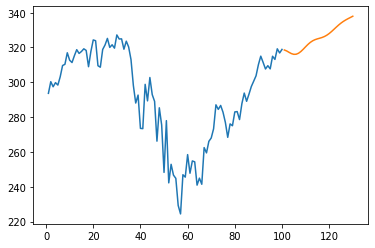

In [139]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

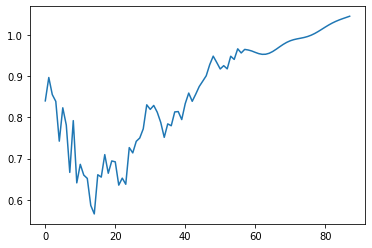

In [140]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [141]:
df3=scaler.inverse_transform(df3).tolist()

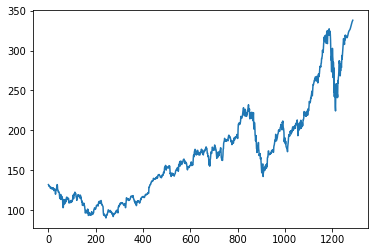

In [142]:
plt.plot(df3)

In [119]:
#from numpy import array
#Ist_output=[]
#n_steps=100
#i=0
#while(i>30):
#  if(len(tempt_input)>100):
#    x_input=np.array(tempt_input[1:])
#    print("{} day input {}".format(i,x_input))
#    x_input=x_input.reshape(1,-1)
#    x_input=x_input.reshape(1,n_steps,-1)
#    yhat=model.predict(x_input,verbose=0)
#    print("{} day output {}".format(i,yhat))
#    tempt_input.extend(yhat[0].tolist())
#    tempt_input=tempt_input[1:]
#    Ist_output.extend(yhat[0].tolist())
#    i=i+1
#  else:
#    x_input=x_input.reshape(1,n_steps,1)
#    yhat=model.predict(x_input,verbose=0)
#    print(yhat[0])
#    tempt_input.extend(yhat[0].tolist())
#    print(len(tempt_input))
#    Ist_output.extend(yhat.tolist())
#    i=i+1
#print(Ist_output)



[]
